---
title: Linear Regression Blog Post
author: Dean Smith
date: '2023-5-2'
image: "image.jpg"
description: "In this blog I show the effectiveness of least-squares linear regression and LASSO regularization"
format: html
---

# Linear Regression

In this blog post, I will implement least-squares linear regression and show its effectiveness along with experimenting on datasets with many features.

First, I define some functions I will use later and import my packages along with my source code which can be fonud at: 

In [825]:
import numpy as np
from matplotlib import pyplot as plt
from LinearRegression import LinearRegression

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

Next, I randomly create my dataset using the LR_data function defined in the cell above. With this dataset I use one feature in p_features so the data is easy to visualize and the implementation is simple.

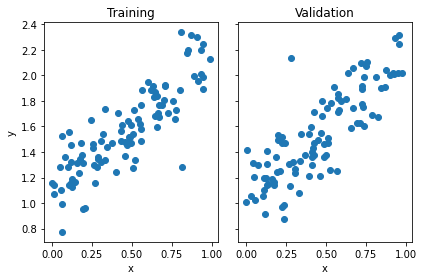

In [826]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Now, I will define my models LR and LR2 to demonstrate the functionality of the least-squares linear regression and linear regression with gradient descent. As we can see, both produce the same weights along with training and validation score.

In [827]:


LR = LinearRegression()

LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(LR.w)

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, 0.005, 300)

print(LR2.w)

print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


[1.02648217 1.09309375]
Training score = 0.7294
Validation score = 0.6914
[1.02648217 1.09309375]
Training score = 0.7294
Validation score = 0.6914


Here is a plot of the progression for the training loss of my model I trained with gradient descent.

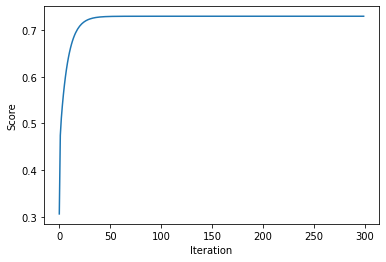

In [828]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")


Next, I will demonstrate the effectiveness of linear regression as the number of features in a dataset becomes larger. To do this, I have set up an algorithm to train a model and log its training and validation data for all number of features 1-99 (or n_train - 1). I have also printed out the last five validation scores to show variance of the model when the number features become increasingly larger.

In [829]:
n_train = 100
n_val = 100
noise = 0.2

num_features = range(1,100)
train_score = []
val_score = []

for r in range(1,100):
    p_features = r
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR3 = LinearRegression()
    LR3.fit_analytic(X_train, y_train)
    train_score.append(LR3.score(X_train, y_train))
    val_score.append(LR3.score(X_val, y_val))

print(val_score[-5:])




    

[0.6426486631930868, 0.6025571541658967, -0.04697862335287928, 0.7265468875728334, -0.01049629698831911]


Here, I plot the results from my algorithm above. It makes sense that the training data would plateu as the number of features becomes larger and the validation data becomes more varied because this is a strong sign of overfitting.

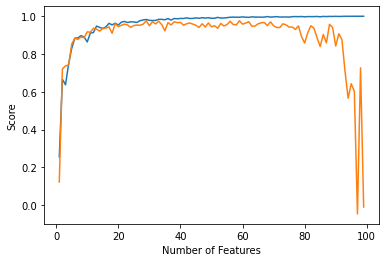

In [830]:
plt.plot(num_features, train_score, label='training data')
plt.plot(num_features, val_score, label="validation data")
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Score")

Finally, I want to show the effectiveness of LASSO regularization which uses a regularizing term to combat overfitting in overparameterized problems.

In [831]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

L.score(X_val, y_val)


0.7148639800717893

Out of my own curiousity, I wanted to see how LASSO regularization performs against the linear regression model as the number of features increases.

In [832]:
n_train = 100
n_val = 100
noise = 0.2

num_features = range(1,100)
train_score = []
val_score = []

for r in range(1,100):
    p_features = r
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR3 = Lasso(alpha = 0.001)
    LR3.fit(X_train, y_train)
    train_score.append(LR3.score(X_train, y_train))
    val_score.append(LR3.score(X_val, y_val))

print(val_score[-5:])

[0.678936729525182, 0.7246032101771086, 0.8593997620941247, 0.8602776975346242, 0.7714380225770578]


As we can see in the graph below, LASSO regularization significantly reduces the variance in the validation data as the number of features in a dataset becomes larger.

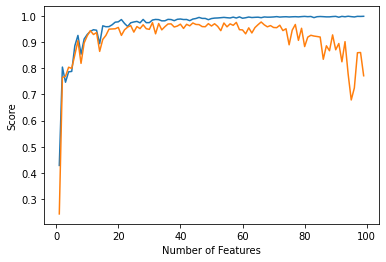

In [833]:
plt.plot(num_features, train_score, label='training data')
plt.plot(num_features, val_score, label="validation data")
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Score")

To conclude, we were able to demonstrate the effectiveness of the least-squares linear regression in comparison with linear regression with gradient descent. We showed the danger of overfitting with linear regression as the amount of features in a dataset becomes larger compared the amount of data points. Lastly, we showed the effectiveness of LASO regularization which does a great job at minimizing the overfitting effects seen in linear regression when the number of features becomes too large relative to the amount of data points.